In [8]:
import pandas as pd

# Load the data from Excel
file_path = 'datasets/patient_risk_profiles.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


   personId  age group:  10 -  14  age group:  15 -  19  age group:  20 -  24  \
0         1                     0                     0                     0   
1         2                     0                     0                     0   
2         3                     0                     0                     0   
3         4                     0                     0                     0   
4         5                     0                     0                     0   

   age group:  65 -  69  age group:  40 -  44  age group:  45 -  49  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   age group:  55 -  59  age group:  85 -  89  age group:  75 -  79  ...  \
0         

In [11]:
import pandas as pd
# Convert scientific notation to decimal if necessary
pd.options.display.float_format = '{:.8f}'.format

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.fillna(0)  # Example: Fill missing values with 0

# Display the first few rows to check the changes
print(data.head())


personId                                                                  0
age group:  10 -  14                                                      0
age group:  15 -  19                                                      0
age group:  20 -  24                                                      0
age group:  65 -  69                                                      0
                                                                         ..
predicted risk of Ulcerative colitis                                      0
predicted risk of Migraine                                                0
predicted risk of Dementia                                                0
predicted risk of  Treatment resistant depression (TRD)                   0
predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis    0
Length: 100, dtype: int64
   personId  age group:  10 -  14  age group:  15 -  19  age group:  20 -  24  \
0         1                     0                     0  

['age group:  10 -  14', 'age group:  15 -  19', 'age group:  20 -  24', 'age group:  65 -  69', 'age group:  40 -  44', 'age group:  45 -  49', 'age group:  55 -  59', 'age group:  85 -  89', 'age group:  75 -  79', 'age group:   5 -   9', 'age group:  25 -  29', 'age group:   0 -   4', 'age group:  70 -  74', 'age group:  50 -  54', 'age group:  60 -  64', 'age group:  35 -  39', 'age group:  30 -  34', 'age group:  80 -  84', 'age group:  90 -  94']


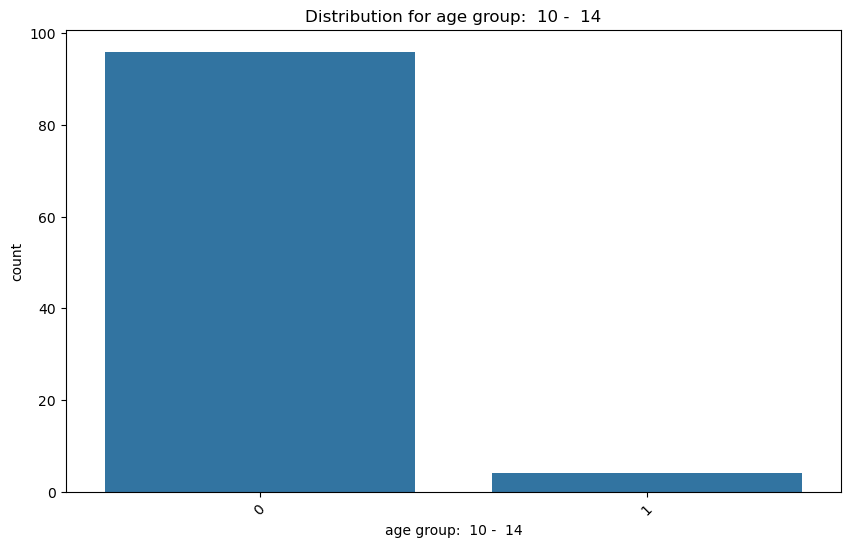

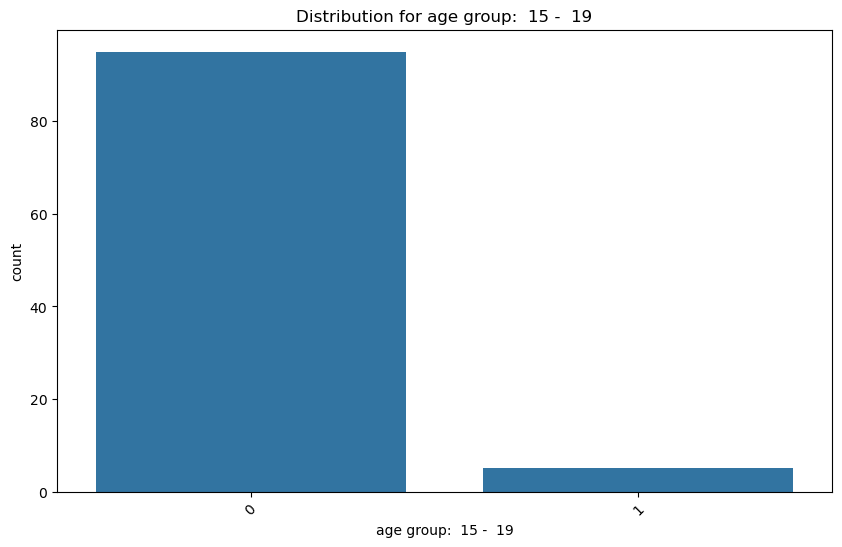

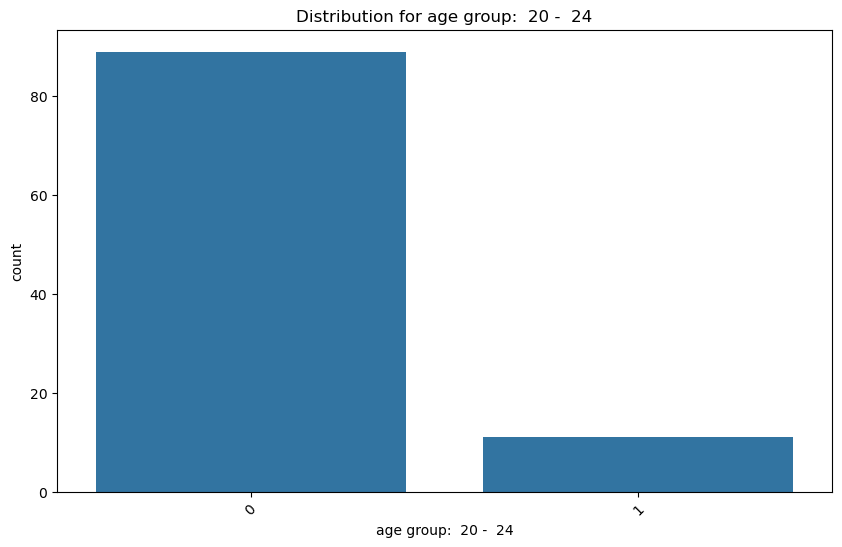

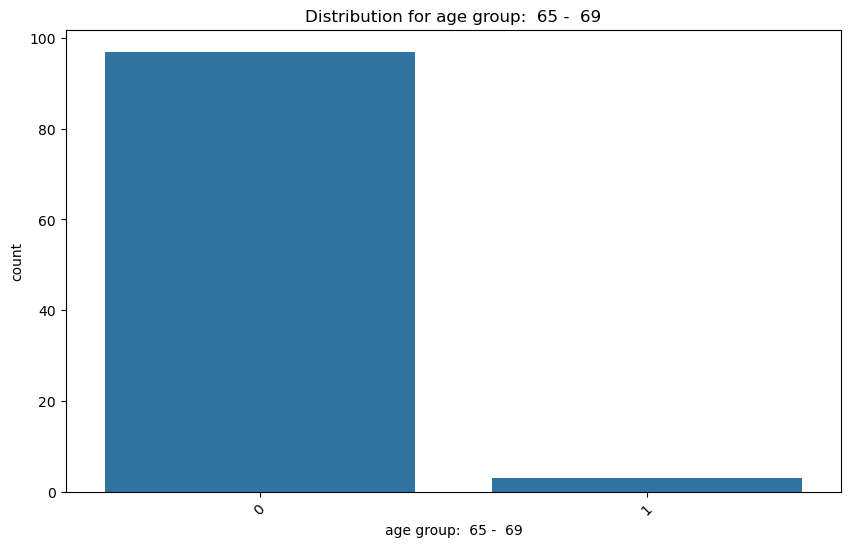

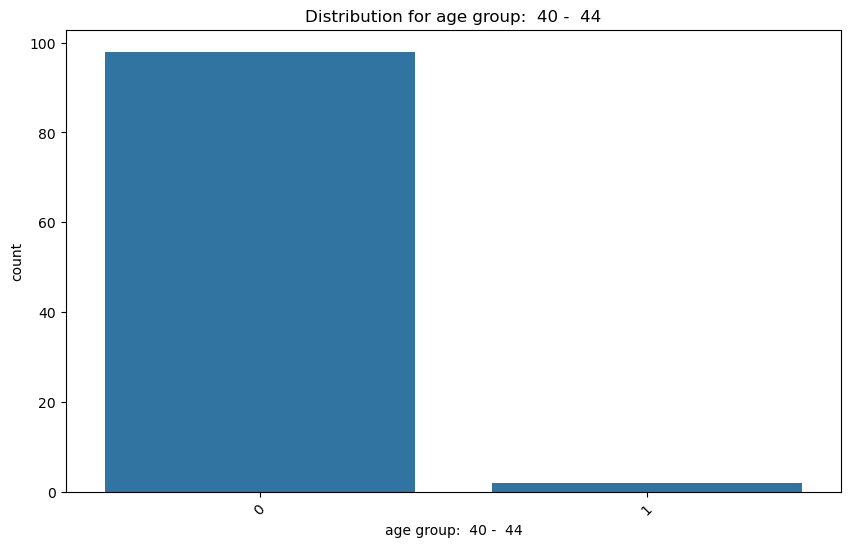

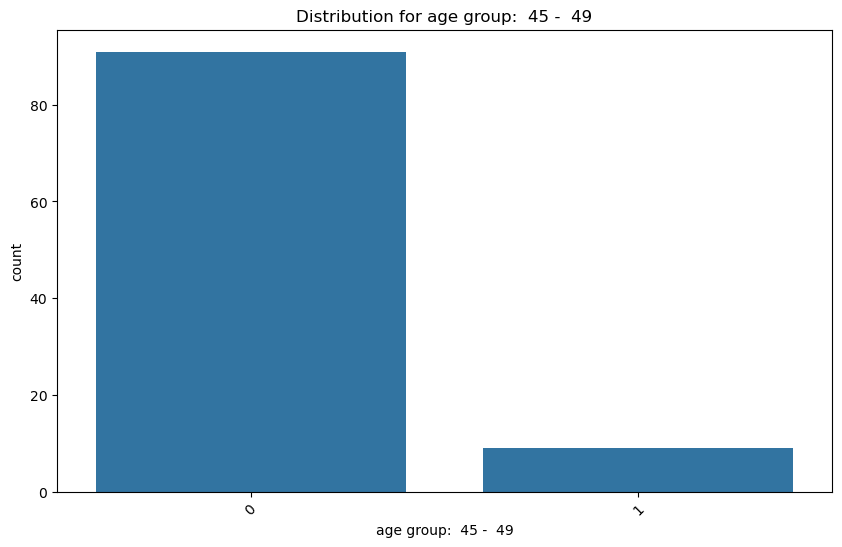

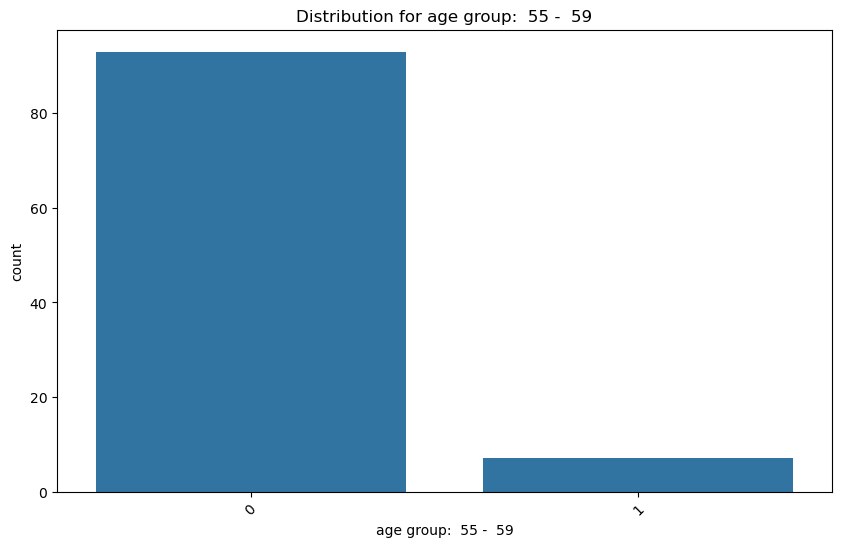

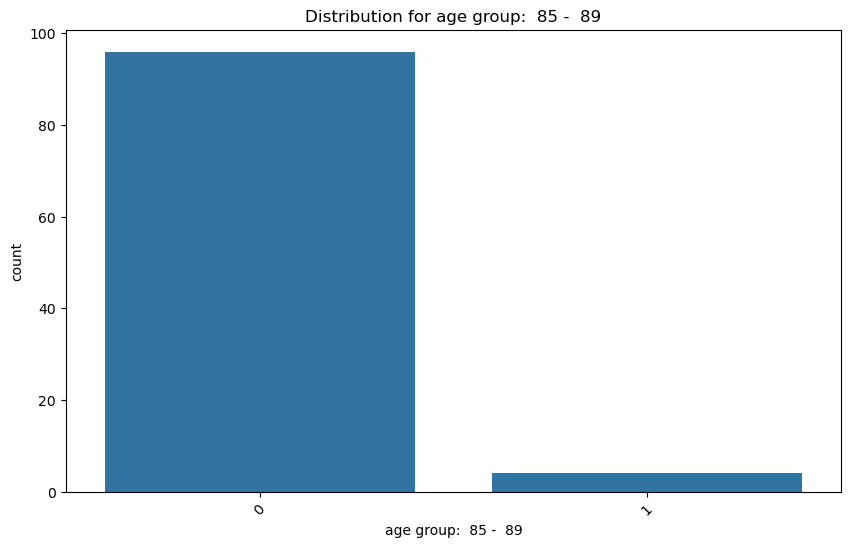

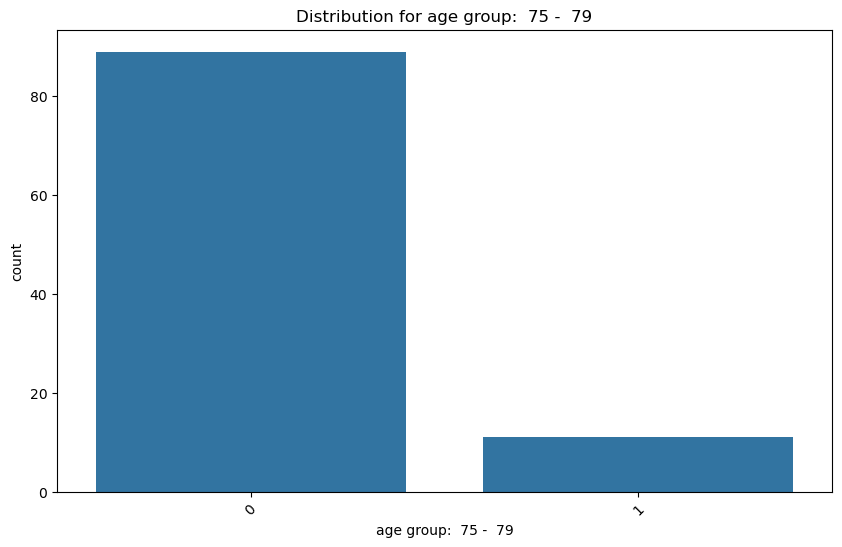

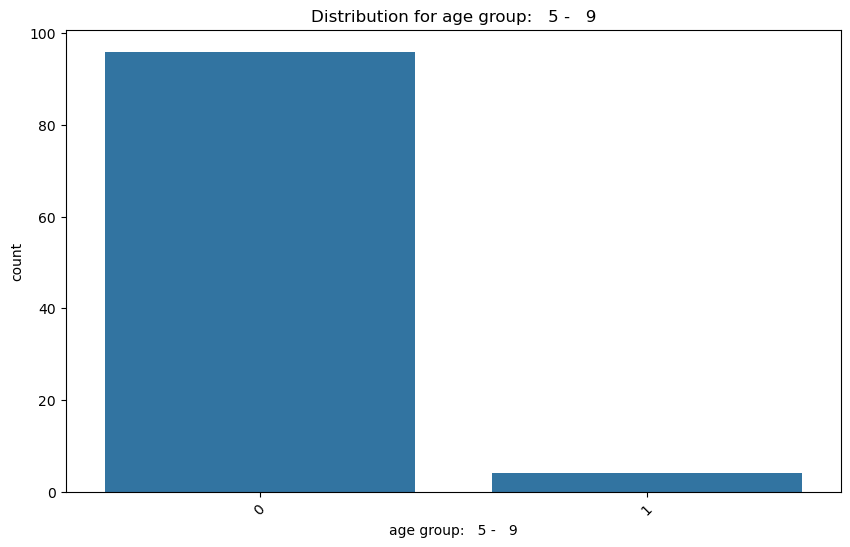

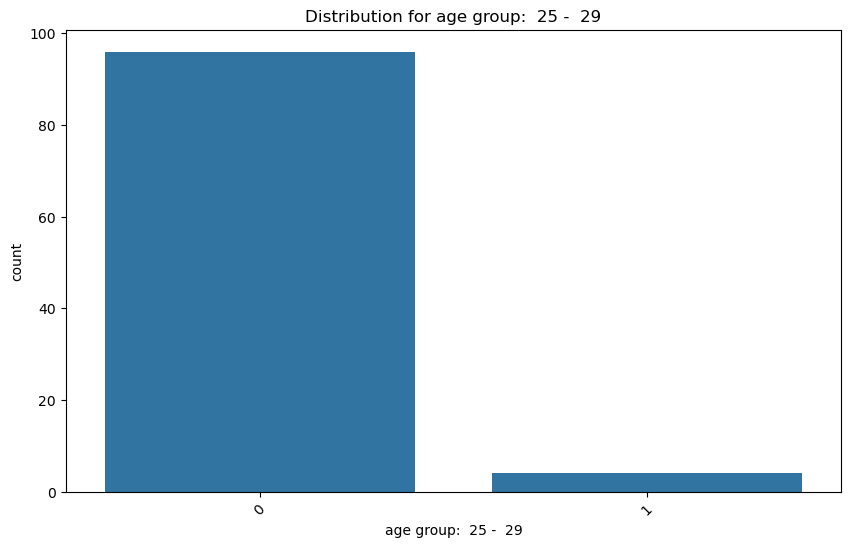

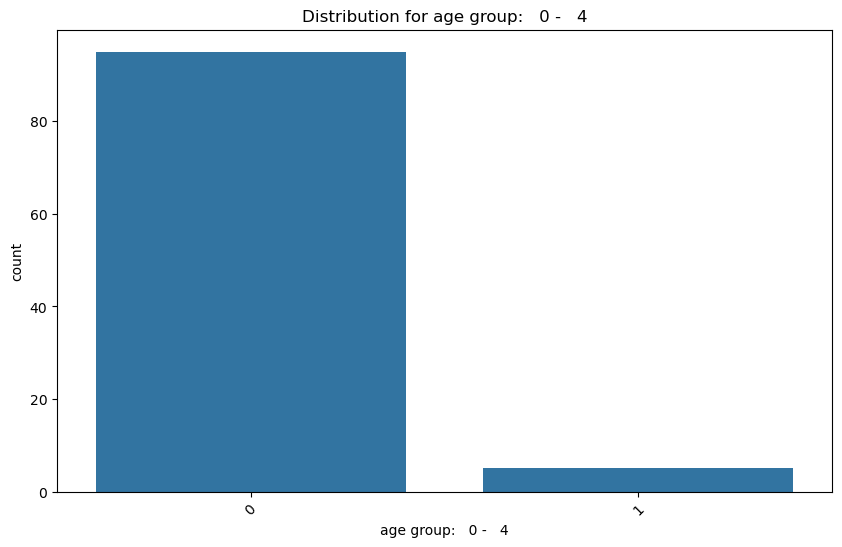

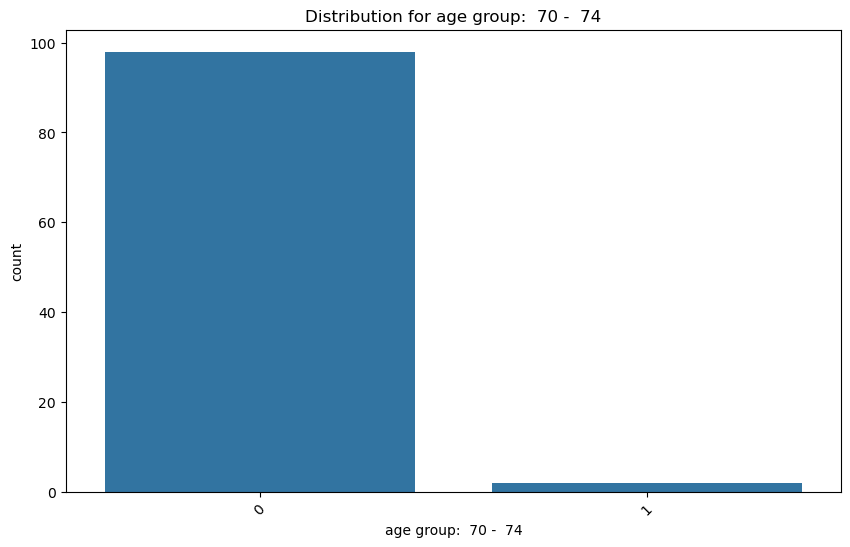

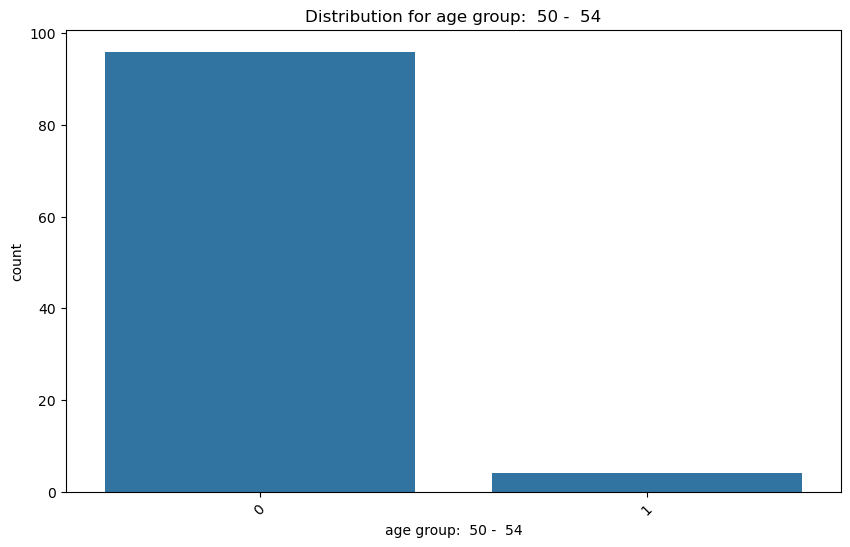

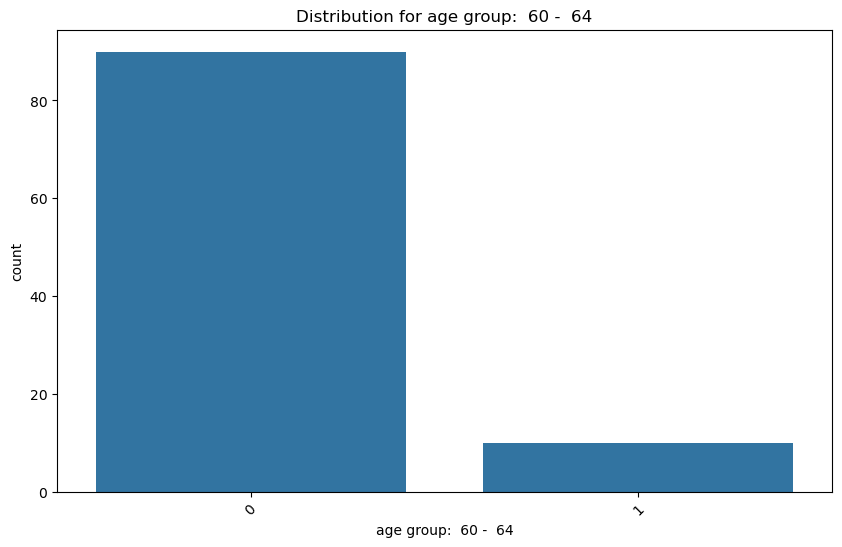

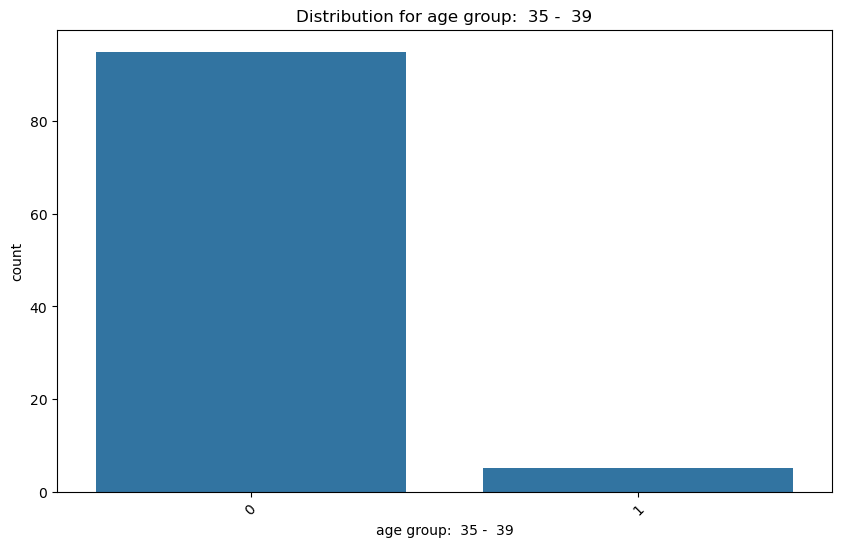

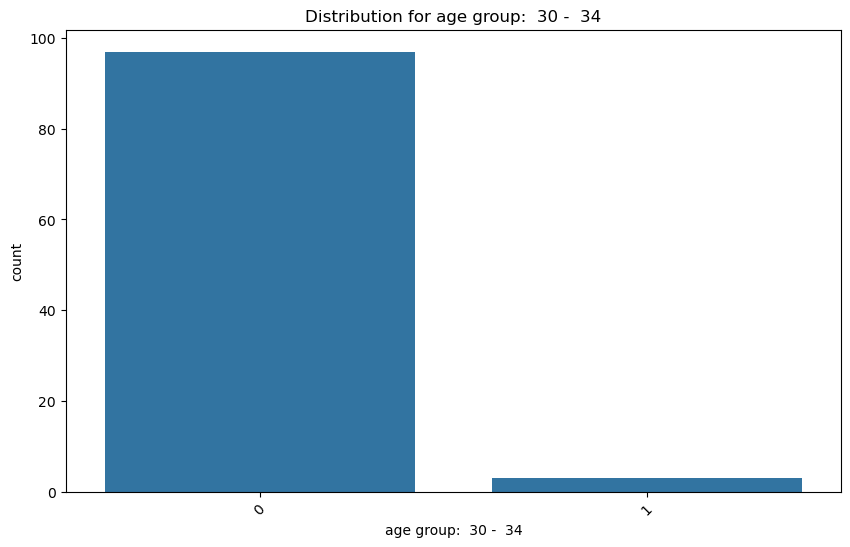

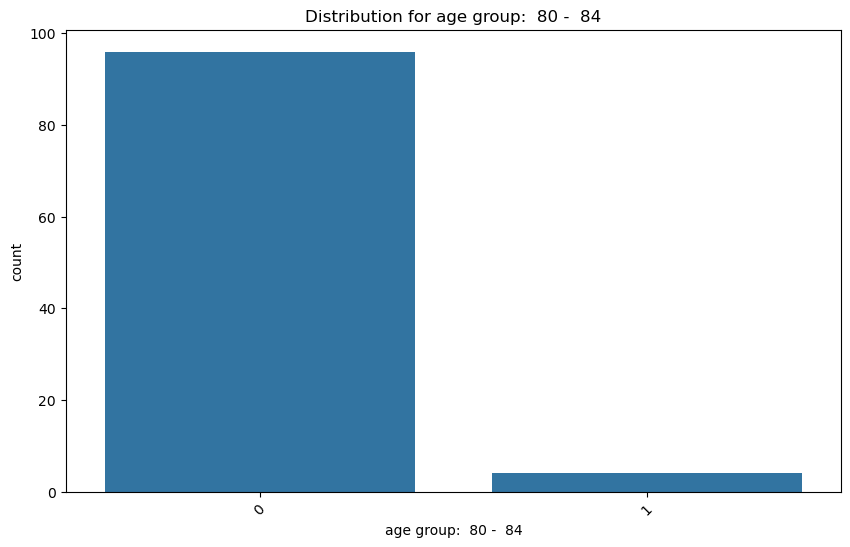

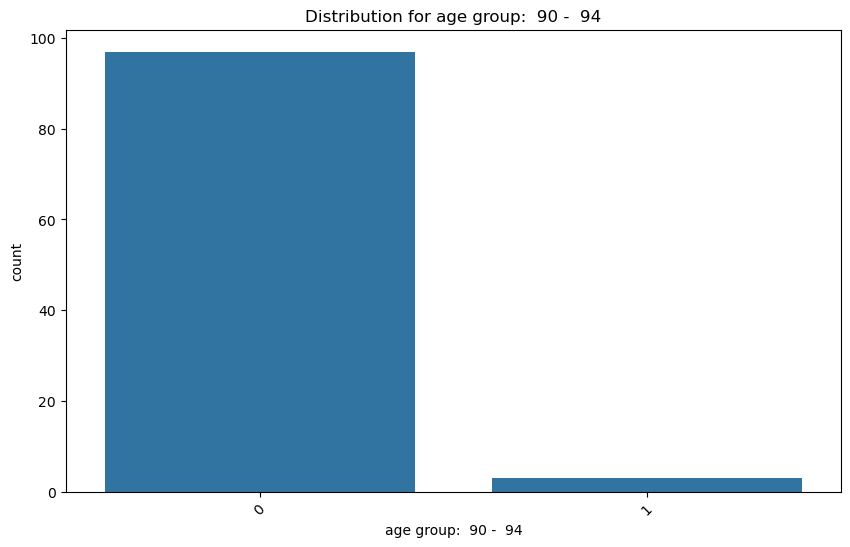

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'datasets/patient_risk_profiles.csv'  # Use the correct file path
data = pd.read_csv(file_path)

# Extract age group columns
age_group_columns = [col for col in data.columns if 'age group' in col]

# Print the column names to verify
print(age_group_columns)

# Plot distributions for each age group
for age_group in age_group_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=age_group)
    plt.title(f'Distribution for {age_group}')
    plt.xticks(rotation=45)
    plt.show()


   personId             Age Group  Count
0         1  age group:  10 -  14      0
1         2  age group:  10 -  14      0
2         3  age group:  10 -  14      0
3         4  age group:  10 -  14      0
4         5  age group:  10 -  14      0


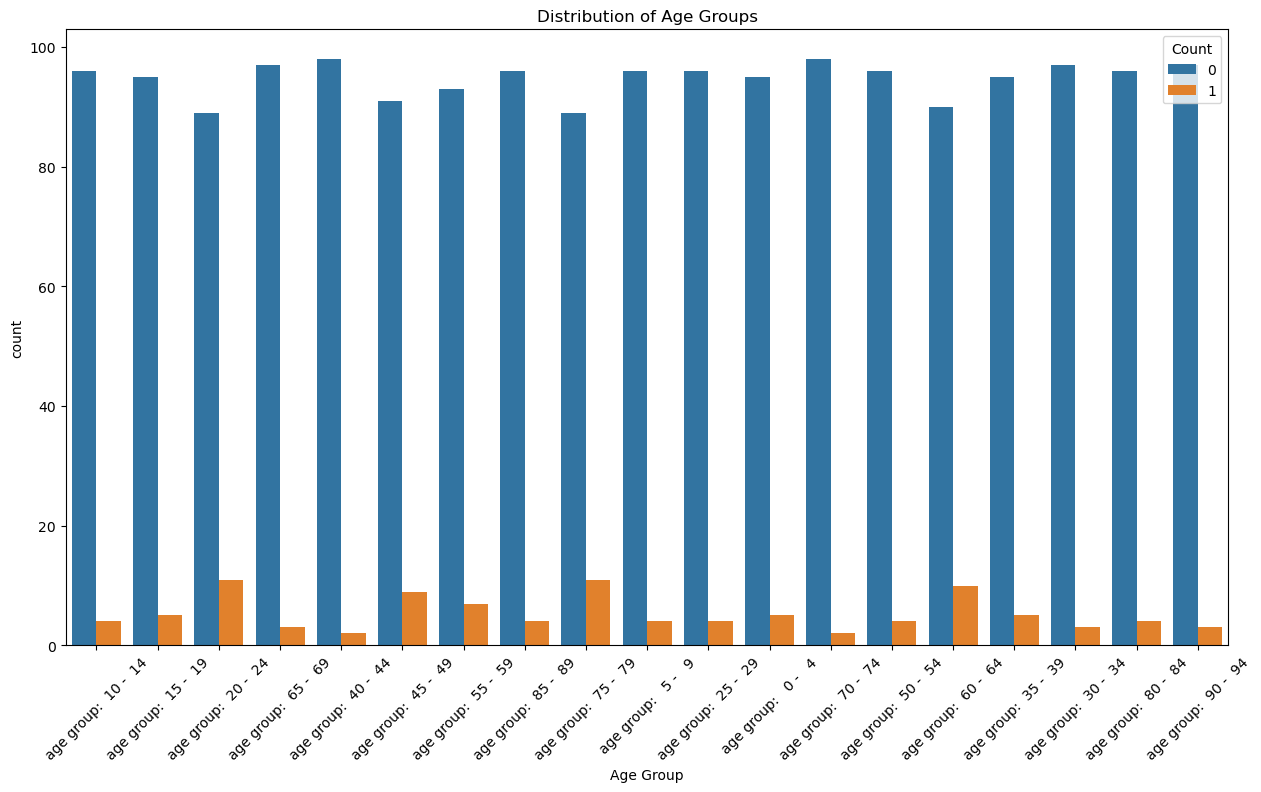

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'datasets/patient_risk_profiles.csv'  # Use the correct file path
data = pd.read_csv(file_path)

# Extract age group columns
age_group_columns = [col for col in data.columns if 'age group' in col]

# Transform the data into a long format
long_data = pd.melt(data, id_vars=['personId'], value_vars=age_group_columns, 
                    var_name='Age Group', value_name='Count')

# Print the transformed data to verify
print(long_data.head())

# Combined plot for all age groups
plt.figure(figsize=(15, 8))
sns.countplot(data=long_data, x='Age Group', hue='Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()


DATA ANALYSIS

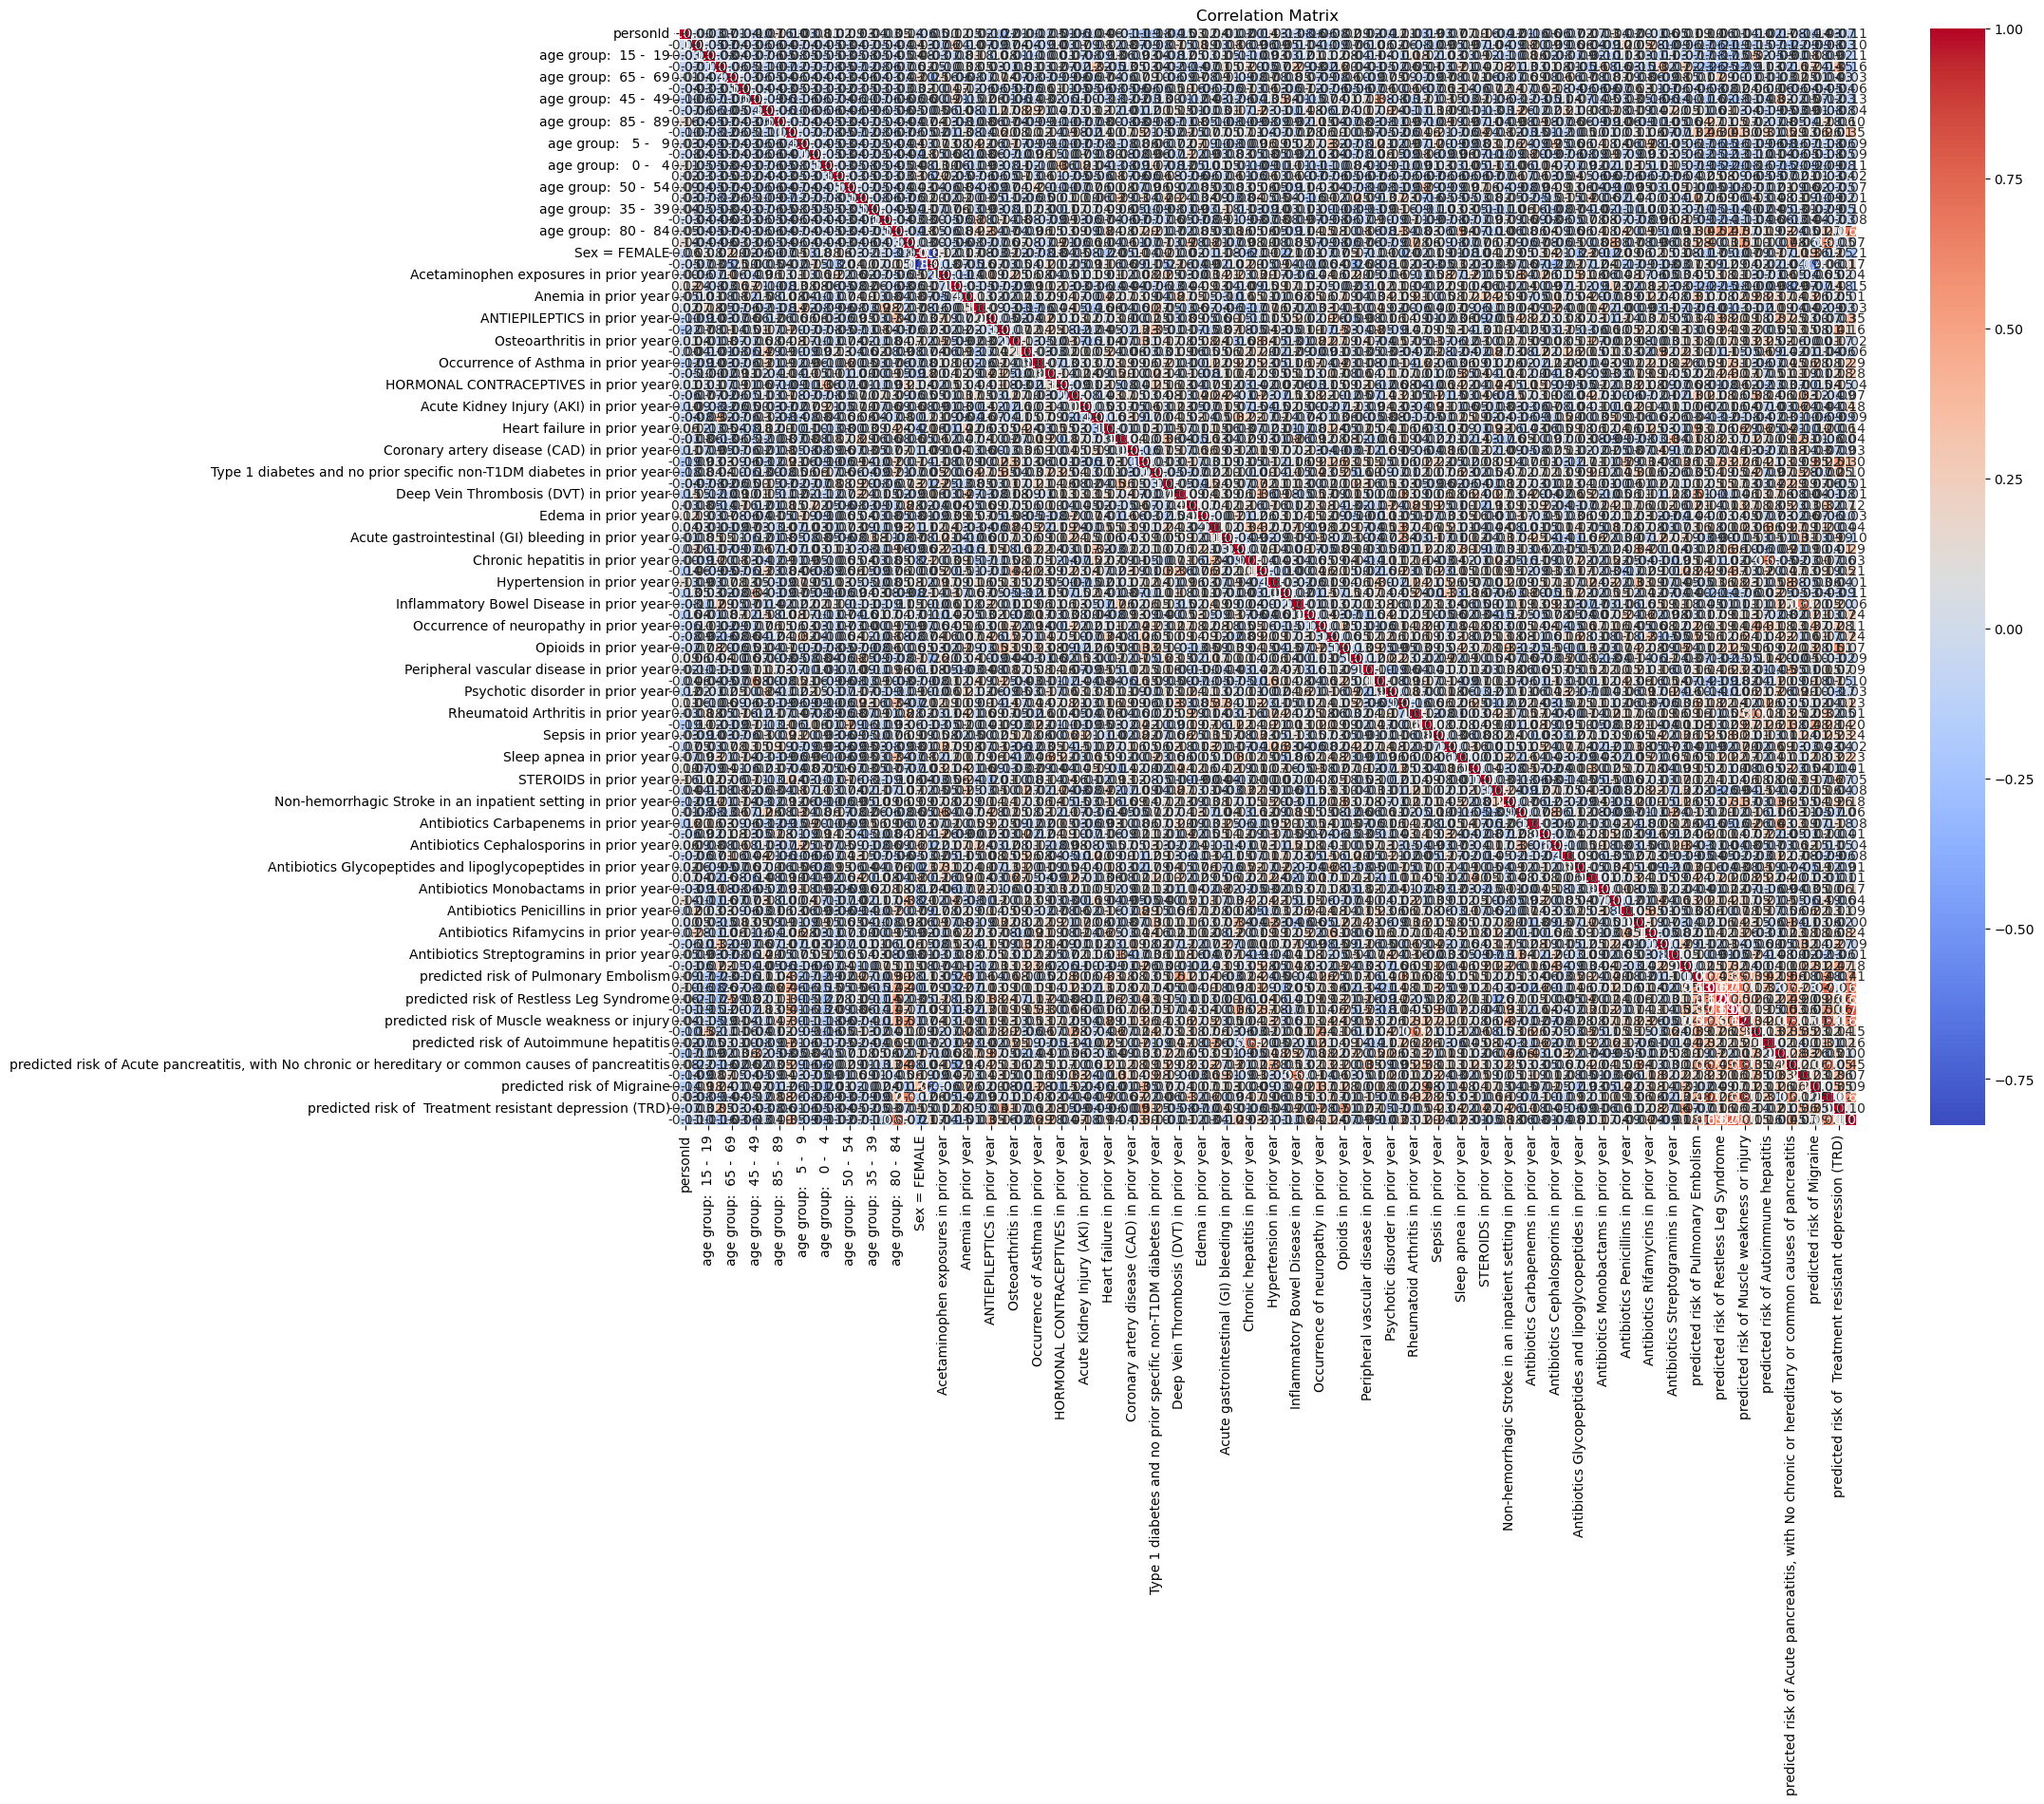

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


CHECKING FOR MISSING VALUES

In [24]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Example: Fill missing values with the mean or drop rows/columns with missing values
data.fillna(data.mean(), inplace=True)


Series([], dtype: int64)


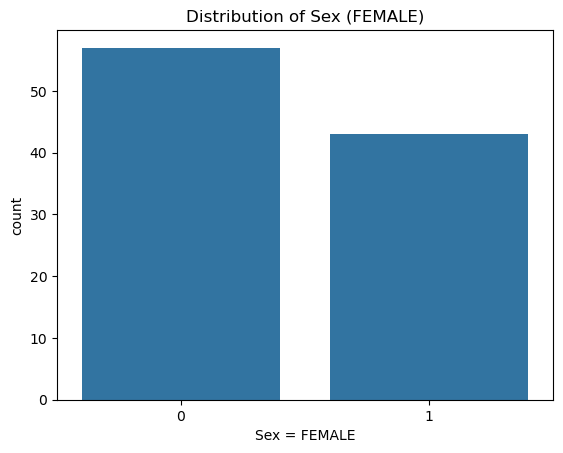

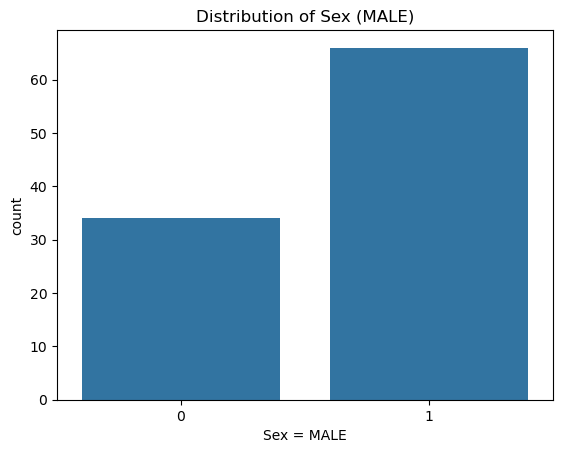

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Sex = FEMALE'
sns.countplot(x='Sex = FEMALE', data=data)
plt.title('Distribution of Sex (FEMALE)')
plt.show()

# Plot the distribution of 'Sex = MALE'
sns.countplot(x='Sex = MALE', data=data)
plt.title('Distribution of Sex (MALE)')
plt.show()


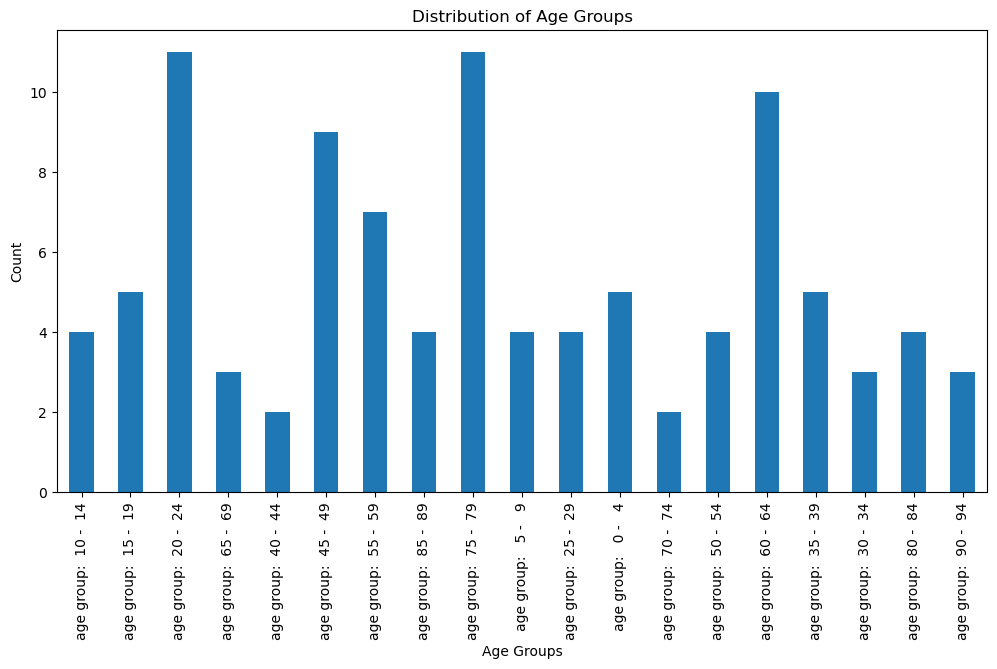

In [26]:
# Extract age group columns
age_group_columns = [col for col in data.columns if col.startswith('age group')]

# Sum the counts for each age group
age_group_counts = data[age_group_columns].sum()

# Create a bar plot for the age group distribution
age_group_counts.plot(kind='bar', figsize=(12, 6), title='Distribution of Age Groups')
plt.ylabel('Count')
plt.xlabel('Age Groups')
plt.show()


In [27]:
# Assuming 'Sex = FEMALE' and 'Sex = MALE' and 0=false, true=1
# data['Sex = FEMALE'] = data['Sex = FEMALE'].map({True: 1, False: 0})
# data['Sex = MALE'] = data['Sex = MALE'].map({True: 1, False: 0})

# Check the mapping
data['Sex = FEMALE'] = data['Sex = FEMALE'].apply(lambda x: 1 if x else 0)
data['Sex = MALE'] = data['Sex = MALE'].apply(lambda x: 1 if x else 0)


SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [29]:
from sklearn.model_selection import train_test_split

# Extract the features and the target variable

# Drop 'personId' and store features
features = data.drop(columns=['personId'])

# Perform the split
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80, 99)
Testing set shape: (20, 99)


FEATURE SCALING

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


MODEL TRAINING

In [33]:
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForCausalLM
from sklearn.model_selection import train_test_split

# Assuming you have your dataset and it's formatted appropriately
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model_name = "sethuiyer/Medichat-Llama3-8B"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

# Prepare data for fine-tuning (example)
# You need to adapt this part to your specific dataset and task
train_dataset = tokenizer(X_train, return_tensors="pt", padding=True, truncation=True)
test_dataset = tokenizer(X_test, return_tensors="pt", padding=True, truncation=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation results
print(eval_results)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.